In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Grab Data
df = pd.read_excel("https://raw.githubusercontent.com/youronlydimwit/Data_ScienceUse_Cases/main/Classification/Data/HRD_Survey_50.xlsx")
df.head()

,Role Satisfaction,Skill Utilization,Career Growth Opportunity,Supervisor Support,Work-Life Balance,Recognition & Appreciation,Company Culture,Training & Development,Communication Effectiveness,Diversity & Inclusion,Work Environment,Compensation,Staff_Id,Month_Of_Service,Years_Of_Service,Residence,Residence_Code,Net_Salary,Resigned
0,3,4,5,2,2,3,3,3,2,3,4,4,SA63171,1,0,Depok,4,5582218,0
1,2,3,1,2,4,3,4,3,2,2,2,4,SP10211,43,3,Jakarta,1,9213443,0
2,3,3,2,2,2,5,4,4,3,2,4,5,SA79627,10,0,Bekasi,3,5836455,0
3,3,3,4,4,3,1,4,4,4,5,3,5,SA02310,17,1,Depok,4,6035466,0
4,3,2,4,3,3,2,3,4,2,3,2,3,SA98565,17,1,Jakarta,1,5568101,0


In [3]:
# Check data types
df.dtypes

Role Satisfaction               int64
Skill Utilization               int64
Career Growth Opportunity       int64
Supervisor Support              int64
Work-Life Balance               int64
Recognition & Appreciation      int64
Company Culture                 int64
Training & Development          int64
Communication Effectiveness     int64
Diversity & Inclusion           int64
Work Environment                int64
Compensation                    int64
Staff_Id                       object
Month_Of_Service                int64
Years_Of_Service                int64
Residence                      object
Residence_Code                  int64
Net_Salary                      int64
Resigned                        int64
dtype: object

In [4]:
# Making a copy of df, but with only numerical information
# Removing unnecessary columns
pred_df = df.drop(columns=['Staff_Id','Residence'])
pred_df.head()

,Role Satisfaction,Skill Utilization,Career Growth Opportunity,Supervisor Support,Work-Life Balance,Recognition & Appreciation,Company Culture,Training & Development,Communication Effectiveness,Diversity & Inclusion,Work Environment,Compensation,Month_Of_Service,Years_Of_Service,Residence_Code,Net_Salary,Resigned
0,3,4,5,2,2,3,3,3,2,3,4,4,1,0,4,5582218,0
1,2,3,1,2,4,3,4,3,2,2,2,4,43,3,1,9213443,0
2,3,3,2,2,2,5,4,4,3,2,4,5,10,0,3,5836455,0
3,3,3,4,4,3,1,4,4,4,5,3,5,17,1,4,6035466,0
4,3,2,4,3,3,2,3,4,2,3,2,3,17,1,1,5568101,0


In [5]:
# Describe the new df
pred_df.describe()

,Role Satisfaction,Skill Utilization,Career Growth Opportunity,Supervisor Support,Work-Life Balance,Recognition & Appreciation,Company Culture,Training & Development,Communication Effectiveness,Diversity & Inclusion,Work Environment,Compensation,Month_Of_Service,Years_Of_Service,Residence_Code,Net_Salary,Resigned
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,5.000000e+02,500.0000
mean,3.006000,3.038000,3.004000,2.948000,2.950000,3.01600,2.946000,3.016000,3.024000,3.014000,2.990000,4.022000,34.510000,2.30400,3.018000,7.908836e+06,0.1000
std,0.989911,1.046301,1.020817,0.991596,0.980522,1.00487,1.000543,1.042073,1.016608,1.048811,0.977656,1.021569,19.267391,1.43935,1.444246,4.383144e+06,0.3003
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.00000,1.000000,5.070036e+06,0.0000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,18.750000,1.00000,2.000000,5.688296e+06,0.0000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,35.000000,2.00000,3.000000,6.341903e+06,0.0000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,50.000000,4.00000,4.000000,8.342422e+06,0.0000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,66.000000,4.00000,5.000000,5.443630e+07,1.0000


## First Takeaway
- min 1 max 5
- mean stayed close to 3 indicating normality in the data

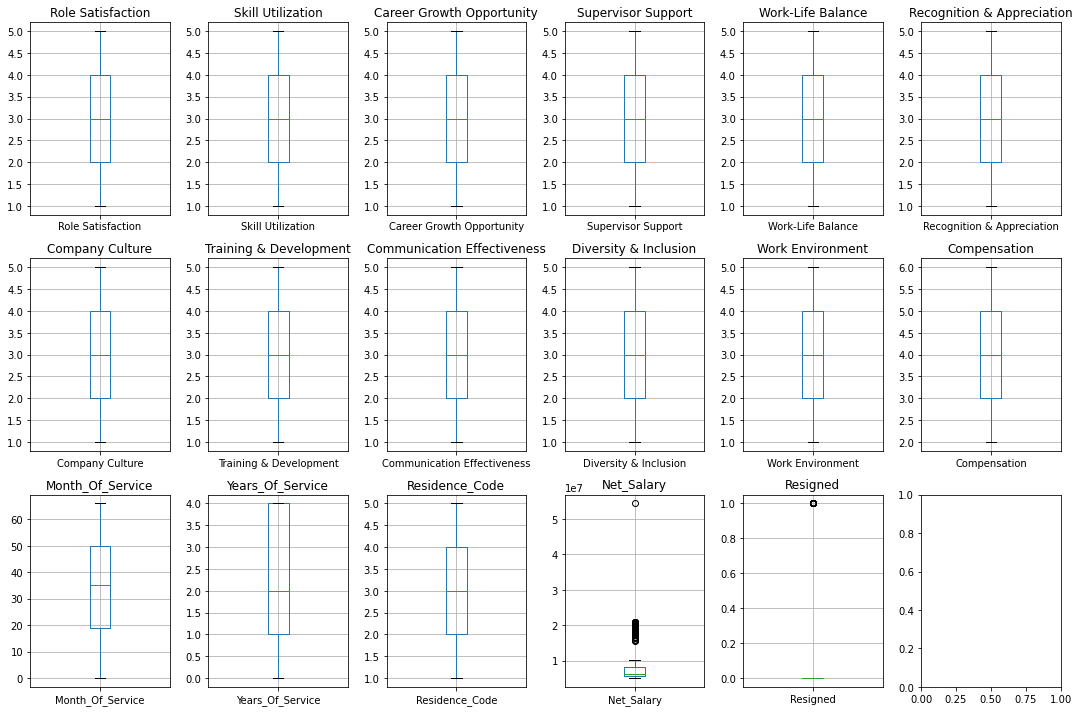

In [6]:
# Making BOXPLOTS to see if there's outlier
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=len(pred_df.columns) // 3 + (len(pred_df.columns) % 3 > 0), figsize=(15, 10))

# Flatten the axes array to easily iterate over
axes = axes.flatten()

# Loop through each column and create a boxplot
for i, col in enumerate(pred_df.columns):
    pred_df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
import seaborn as sns
from scipy.stats import norm

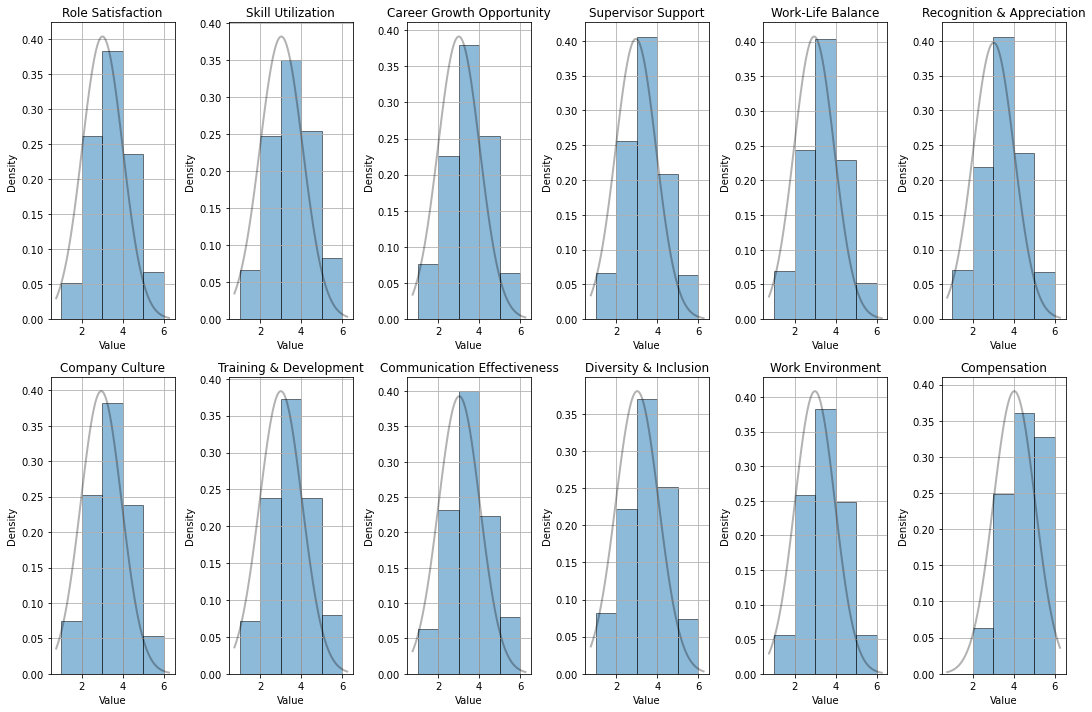

In [8]:
# Making HISTOGRAM and comparing with normal distirbution's bell curve
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15, 10))

# Flatten the axes array to easily iterate over
axes = axes.flatten()

# Loop through each column and create a histogram
for i, col in enumerate(pred_df.columns[:12]):
    # Plot histogram
    pred_df[col].hist(ax=axes[i], bins=[1, 2, 3, 4, 5, 6], alpha=0.5, edgecolor='black', density=True)  # Adjust the number of bins as needed
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

    # Add normal distribution curve
    mu, std = norm.fit(pred_df[col])
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p, 'k', linewidth=2, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

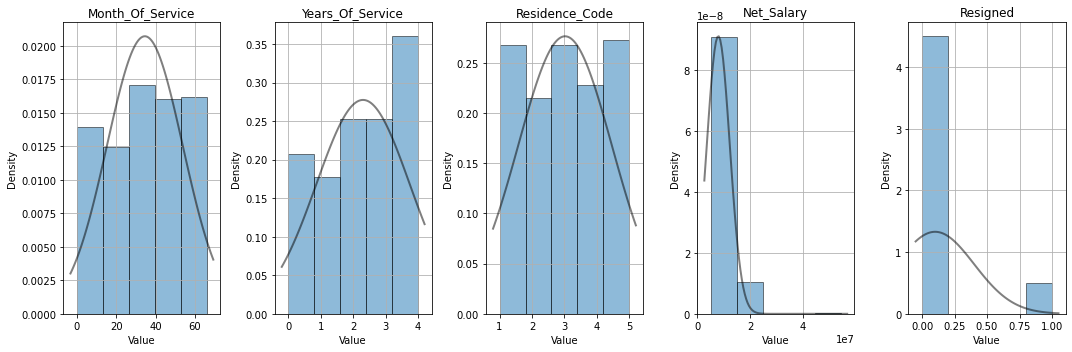

In [9]:
# Making HISTOGRAM and comparing with normal distirbution's bell curve,
# But this time for the remaining columns
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))

# Loop through each column and create a histogram
for i, col in enumerate(['Month_Of_Service', 'Years_Of_Service', 'Residence_Code', 'Net_Salary', 'Resigned']):
    # Plot histogram
    pred_df[col].hist(ax=axes[i], bins=5, alpha=0.5, edgecolor='black', density=True)  # Adjust the number of bins as needed
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

    # Add normal distribution curve
    mu, std = norm.fit(pred_df[col])
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p, 'k', linewidth=2, alpha=0.5)  # Adjust opacity here

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

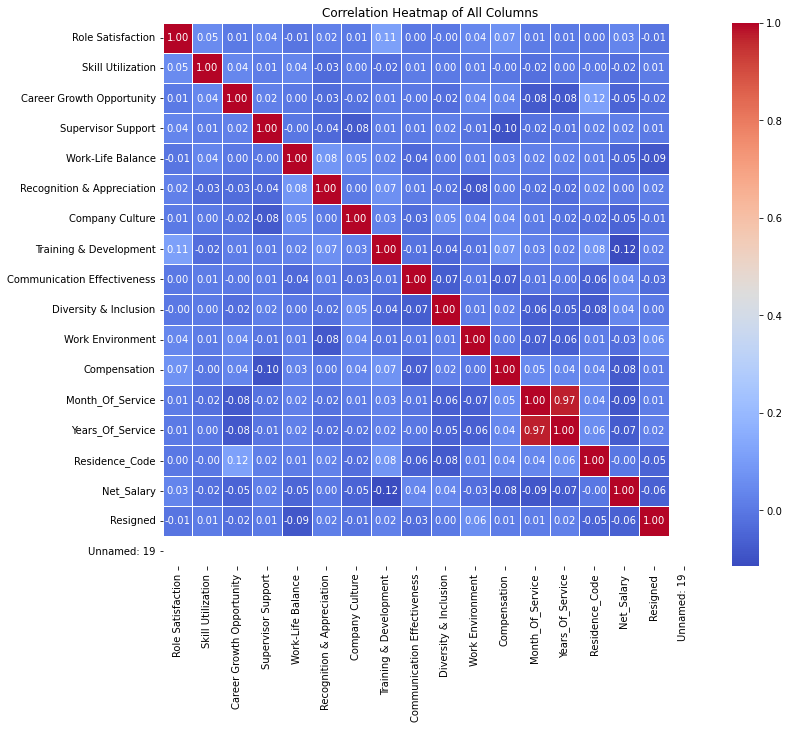

In [10]:
# Calculate the correlation matrix
correlation_matrix = pred_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of All Columns')
plt.show()

## Second takeaway
- drop years_of_service since it has autocorrelation
- This is an imbalanced dataset, where 1 is way smaller than 0. So needs methods to predict like SMOTE or undersampling

In [ ]:
Bar graph resigned column

In [10]:
pred_df = pred_df.drop(columns=["Years_Of_Service"])
pred_df.dtypes

Role Satisfaction              int64
Skill Utilization              int64
Career Growth Opportunity      int64
Supervisor Support             int64
Work-Life Balance              int64
Recognition & Appreciation     int64
Company Culture                int64
Training & Development         int64
Communication Effectiveness    int64
Diversity & Inclusion          int64
Work Environment               int64
Compensation                   int64
Month_Of_Service               int64
Residence_Code                 int64
Net_Salary                     int64
Resigned                       int64
dtype: object

# Training the data

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [15]:
# Split the data into features (X) and labels (y)
X = pred_df.drop(columns=['Resigned'])
y = pred_df['Resigned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary to store results
results = {'Model': [], 'F1_score': [], 'Accuracy': [], 'Precision': [], 'Recall': []}

In [20]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate models
models = {"Random Forest": rf_model, "Decision Tree": dt_model, "Logistic Regression": lr_model}
metrics = {"Accuracy": accuracy_score, "Precision": precision_score, "Recall": recall_score, "F1 Score": f1_score}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    result = {}
    for metric_name, metric_func in metrics.items():
        result[metric_name] = metric_func(y_test, y_pred)
    results[name] = result

# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Plot training results
results_df

,Random Forest,Decision Tree,Logistic Regression
Accuracy,0.7,0.680000,0.7
Precision,0.0,0.444444,0.0
Recall,0.0,0.266667,0.0
F1 Score,0.0,0.333333,0.0


# Third Takeaway
- score interpretations
- whys and could be's

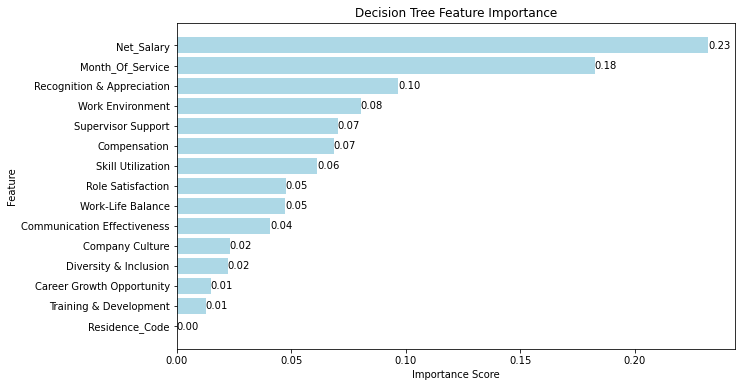

In [73]:
# Assuming dt_model is your trained Decision Tree model
# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance with decimal value labels
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightblue')

plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top

# Add decimal value labels to bars
for bar, importance in zip(bars, feature_importance_df['Importance']):
    plt.text(importance, bar.get_y() + bar.get_height()/2, f'{importance:.2f}', ha='left', va='center')

plt.show()

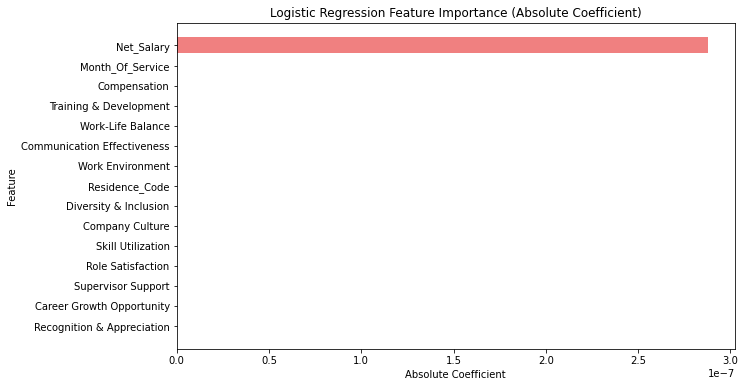

In [72]:
# Assuming lr_model is your trained Logistic Regression model
# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Get feature coefficients (weights)
feature_coefficients = lr_model.coef_[0]

# Create a DataFrame to store feature names and their coefficients
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': feature_coefficients})

# Sort the DataFrame by coefficient magnitudes in descending order
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()  # Absolute value for sorting
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Abs_Coefficient'], color='lightcoral')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance (Absolute Coefficient)')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

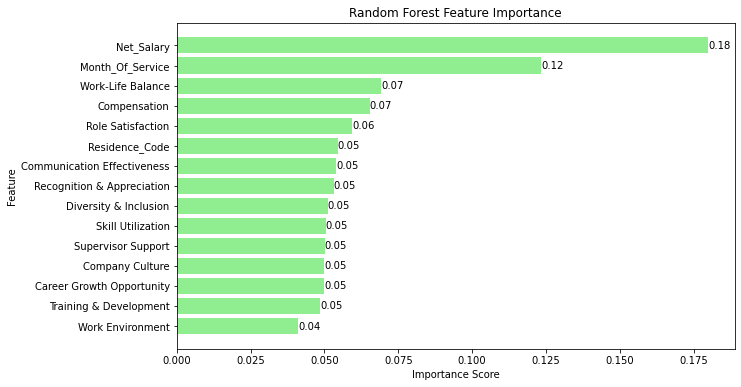

In [74]:
# Assuming rf_model is your trained Random Forest model
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance with decimal value labels
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightgreen')

plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top

# Add decimal value labels to bars
for bar, importance in zip(bars, feature_importance_df['Importance']):
    plt.text(importance, bar.get_y() + bar.get_height()/2, f'{importance:.2f}', ha='left', va='center')

plt.show()

In [ ]:
=========

In [17]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight

In [22]:
# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Undersample the majority class
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Store results
results['Model'].append('Logistic Regression with Random Under Sampling')
results['F1_score'].append(f1)
results['Accuracy'].append(accuracy)
results['Precision'].append(precision)
results['Recall'].append(recall)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.13
Precision: 0.13
Recall: 1.0
F1 Score: 0.23008849557522126


In [23]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Oversample the minority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Store results
results['Model'].append('Logistic Regression with SMOTE Over Sampling')
results['F1_score'].append(f1)
results['Accuracy'].append(accuracy)
results['Precision'].append(precision)
results['Recall'].append(recall)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.13
Precision: 0.13
Recall: 1.0
F1 Score: 0.23008849557522126


In [23]:
# Train the Random Forest model with class weights
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict on the test set using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Store results for Random Forest
results['Model'].append('Random Forest with Class Weights')
results['F1_score'].append(f1_rf)
results['Accuracy'].append(accuracy_rf)
results['Precision'].append(precision_rf)
results['Recall'].append(recall_rf)

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

# Train the Decision Tree model with class weights
dt_model = DecisionTreeClassifier(class_weight='balanced')
dt_model.fit(X_train, y_train)

# Predict on the test set using Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Store results for Decision Tree
results['Model'].append('Decision Tree with Class Weights')
results['F1_score'].append(f1_dt)
results['Accuracy'].append(accuracy_dt)
results['Precision'].append(precision_dt)
results['Recall'].append(recall_dt)

# Print evaluation metrics for Decision Tree
print("\nDecision Tree Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)


Random Forest Metrics:
Accuracy: 0.87
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Decision Tree Metrics:
Accuracy: 0.78
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.naive_bayes import GaussianNB

# Train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
nb_y_pred = nb_model.predict(X_test)

# Calculate evaluation metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred)
nb_recall = recall_score(y_test, nb_y_pred)
nb_f1 = f1_score(y_test, nb_y_pred)

# Store results for Naive Bayes
results['Model'].append('Gaussian Naive Bayes')
results['F1_score'].append(nb_f1)
results['Accuracy'].append(nb_accuracy)
results['Precision'].append(nb_precision)
results['Recall'].append(nb_recall)

# Print evaluation metrics for Naive Bayes
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1 Score:", nb_f1)

Naive Bayes Accuracy: 0.85
Naive Bayes Precision: 0.0
Naive Bayes Recall: 0.0
Naive Bayes F1 Score: 0.0


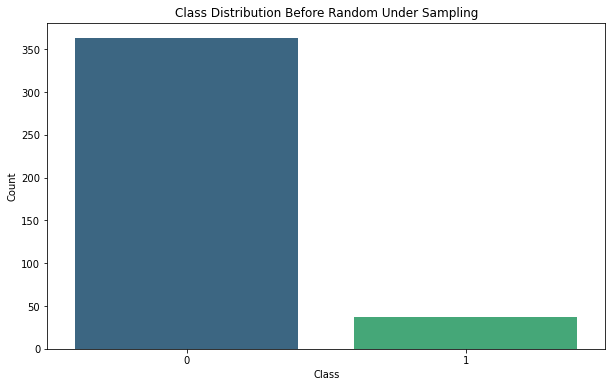

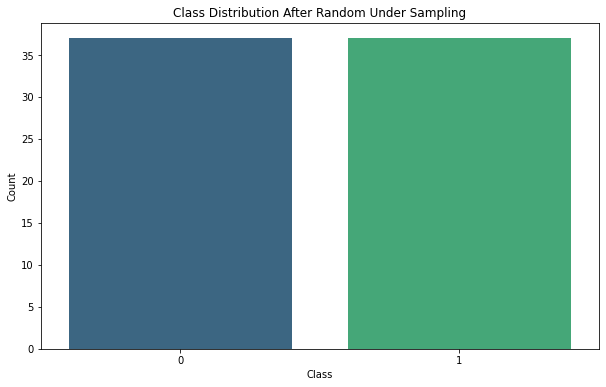

In [24]:
# Plot class distribution before undersampling
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Class Distribution Before Random Under Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Undersample the majority class
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Plot class distribution after undersampling
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_resampled, palette='viridis')
plt.title('Class Distribution After Random Under Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()